# PREDICTION OF UNDERWATER MINES USING SONAR SIGNALS

In [1]:
#import the libraries which are useful for EDA

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set(color_codes = True)
%matplotlib inline

In [2]:
#Load the dataset 
df = pd.read_csv("C:\\Users\\lavpa\\OneDrive\\Documents\\RENU\\03_Sonar.csv")

<b> EXPLORE THE DATASET AND IDENTIFY THE NUMBER OF COLUMNS AND ROWS <b>

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [5]:
df.shape

(208, 61)

<ul>
<li>THERE ARE 208 ROWS AND 61 COLUMNS </li>
</ul>

<b> Check for misssing values in each column and handle them accordingly.<b>



In [6]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

 There are No Missing values.

In [7]:
# check for duplicates 
dup = df.duplicated().sum()
print(' Number of Duplicated Rows are ', format(dup))

 Number of Duplicated Rows are  0


In [8]:
#Target variable " Class"

target = "Class"
##Descriptive statistics 
df['Class'].value_counts()

Class
M    111
R     97
Name: count, dtype: int64

<b> Here, M indicates Mine and R indicates Rock. <b>

<Axes: xlabel='Class', ylabel='count'>

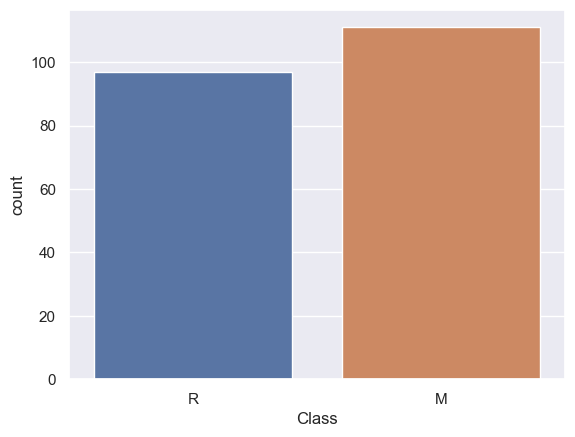

In [9]:
sns.countplot(data=df,x='Class')

<Axes: xlabel='V57', ylabel='V58'>

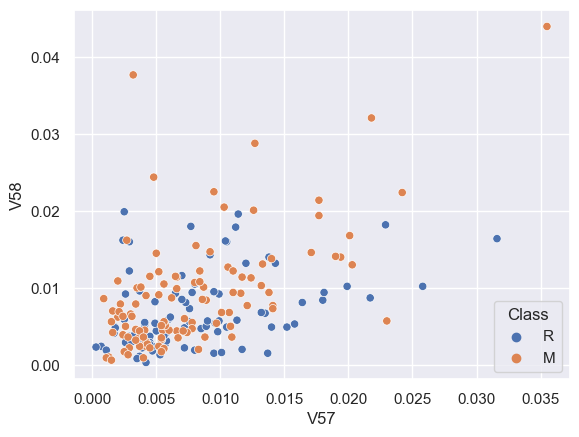

In [10]:
sns.scatterplot(data=df,x='V57',y='V58',hue='Class')

<Axes: xlabel='V4', ylabel='V5'>

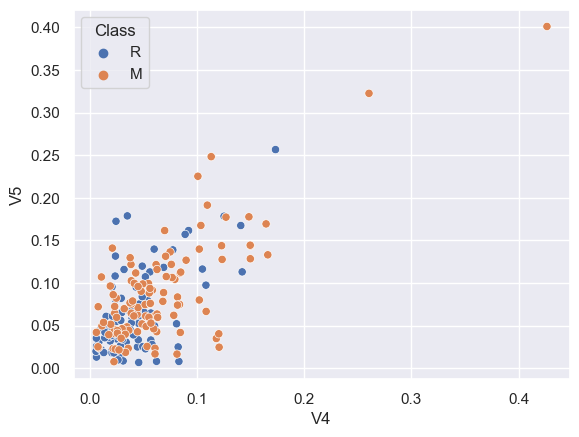

In [11]:
sns.scatterplot(data=df,x='V4',y='V5',hue='Class')

The features ara mixed up to each other

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])
features = df.drop(['Class', 'Class_encoded'], axis=1)

# Calculate correlation matrix
correlation_matrix = features.corr()


In [33]:
# Add the target variable to the features DataFrame
features['Class_encoded'] = df['Class_encoded']

# Calculate correlation matrix
correlation_matrix_with_target = features.corr()

# Print the correlation of each feature with the target variable
print(correlation_matrix_with_target['Class_encoded'])

V1              -0.271694
V2              -0.231238
V3              -0.192195
V4              -0.250638
V5              -0.222232
                   ...   
V57             -0.000933
V58             -0.184191
V59             -0.130826
V60             -0.090055
Class_encoded    1.000000
Name: Class_encoded, Length: 61, dtype: float64


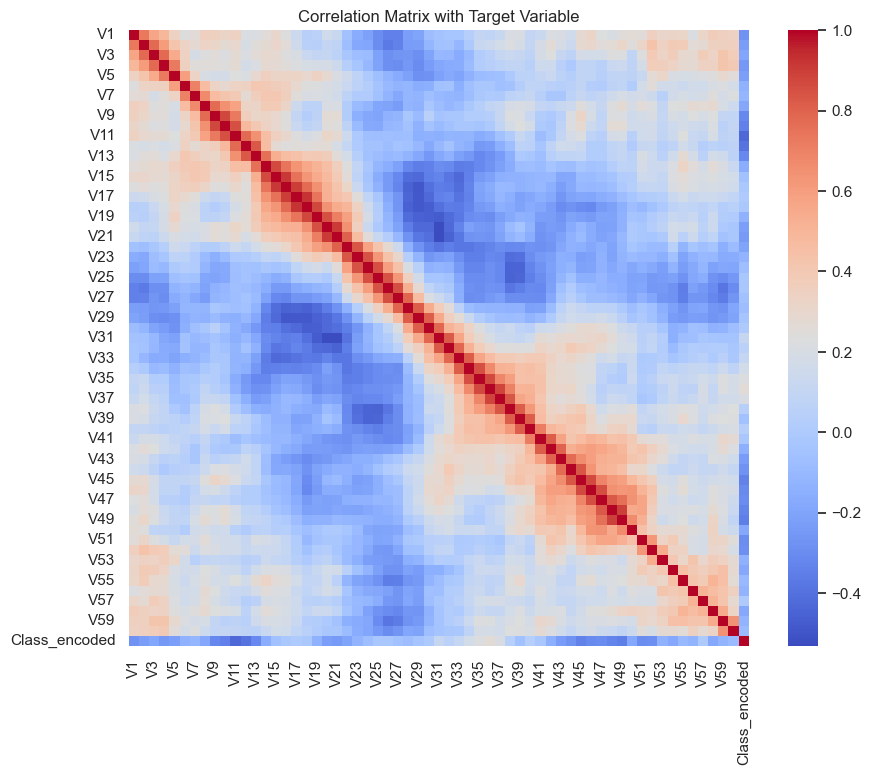

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_target,  cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix with Target Variable')
plt.show()

C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

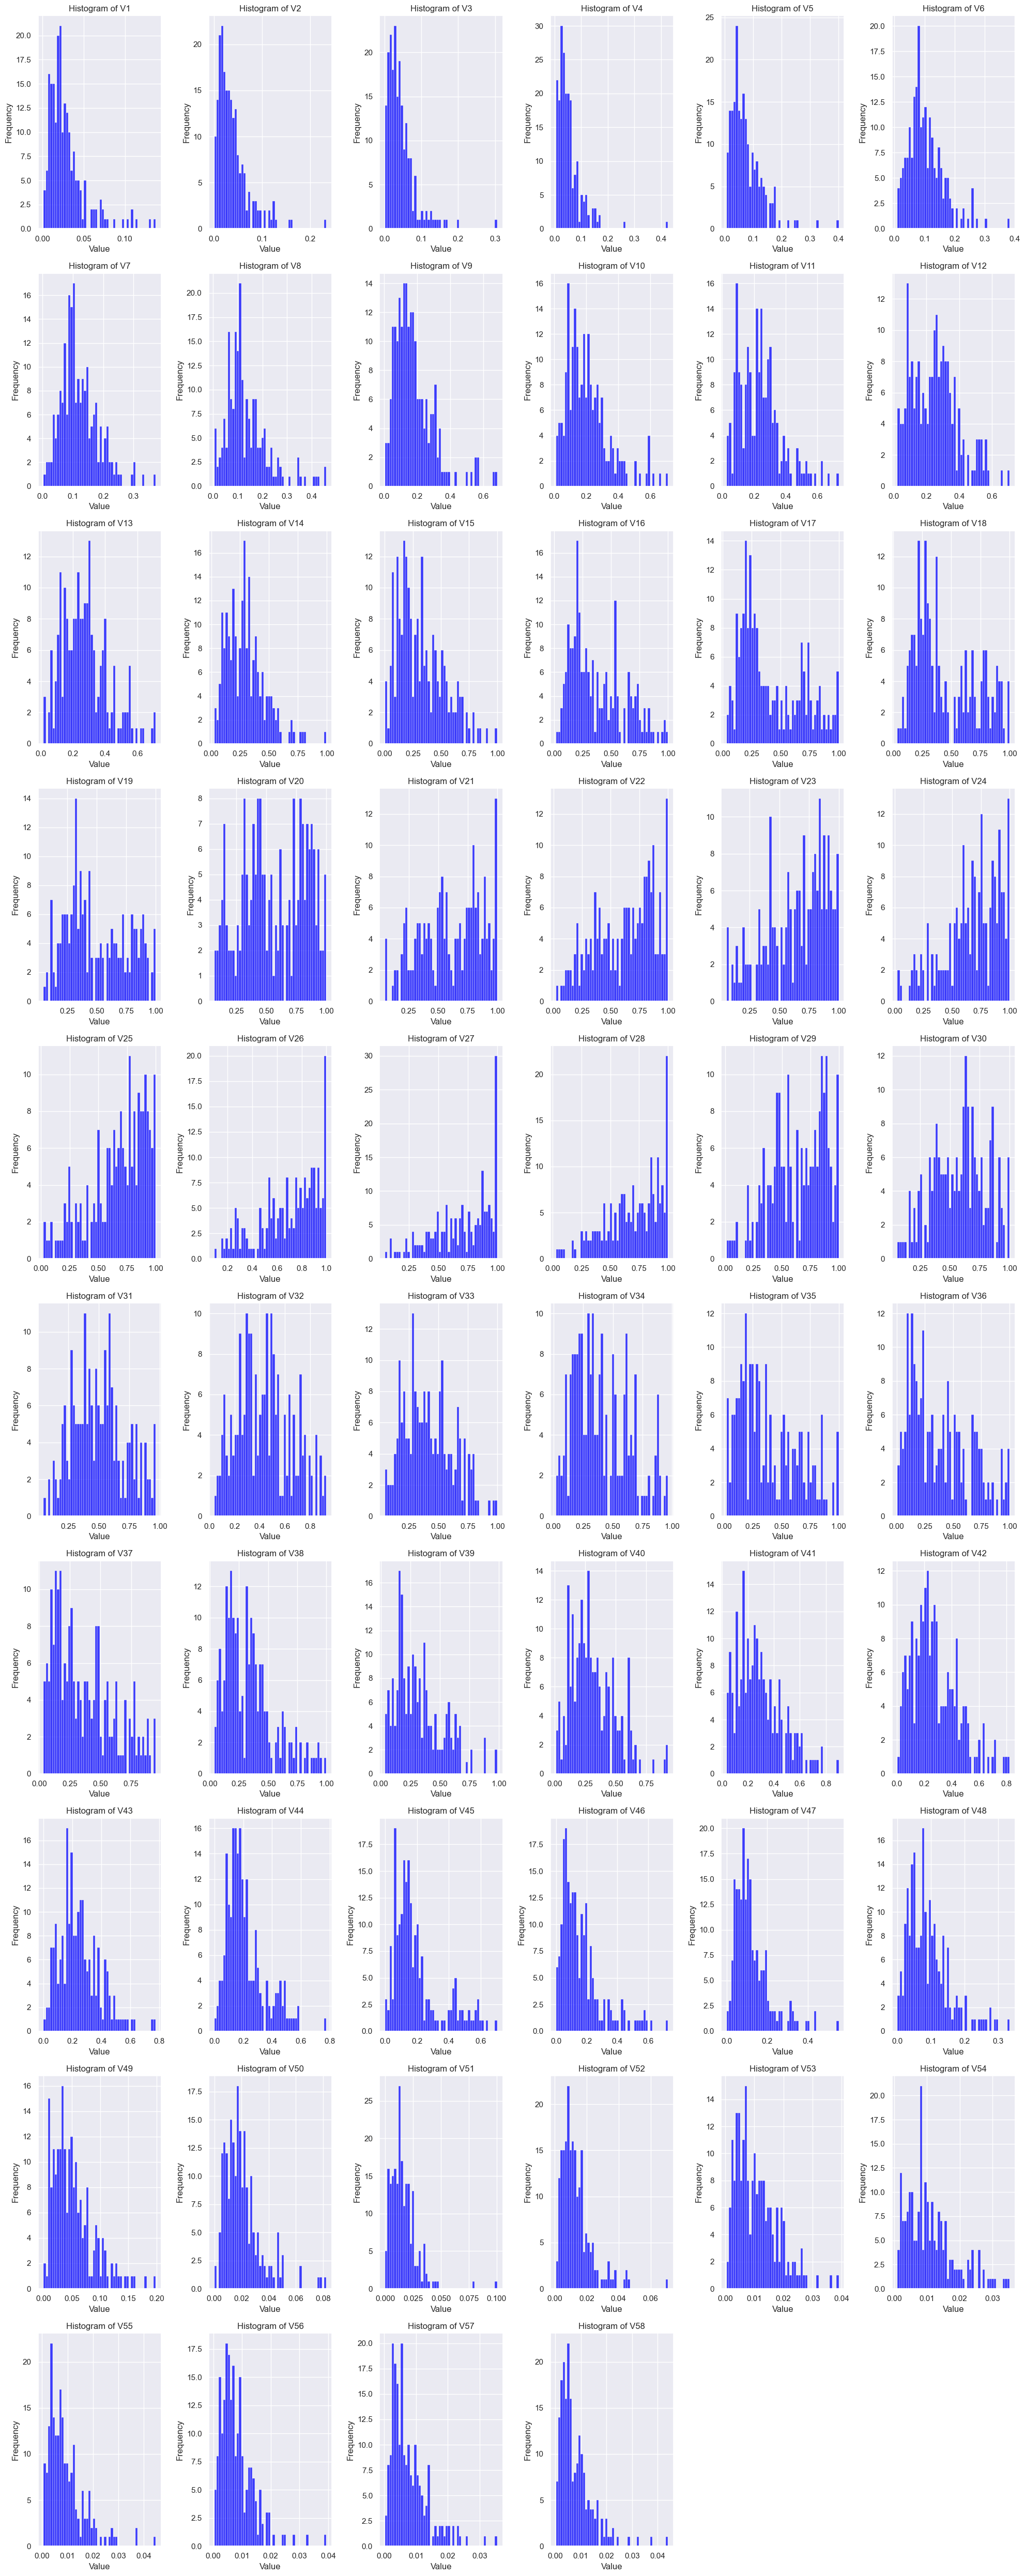

In [14]:
# List of numerical columns (excluding the 'Class' column)
numerical_columns = df.columns[:-3]

# Determine number of rows and columns for subplots
num_features = len(numerical_columns)
num_cols = 6  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create the subplots
plt.figure(figsize=(20, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], bins=50, kde=False, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lavpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

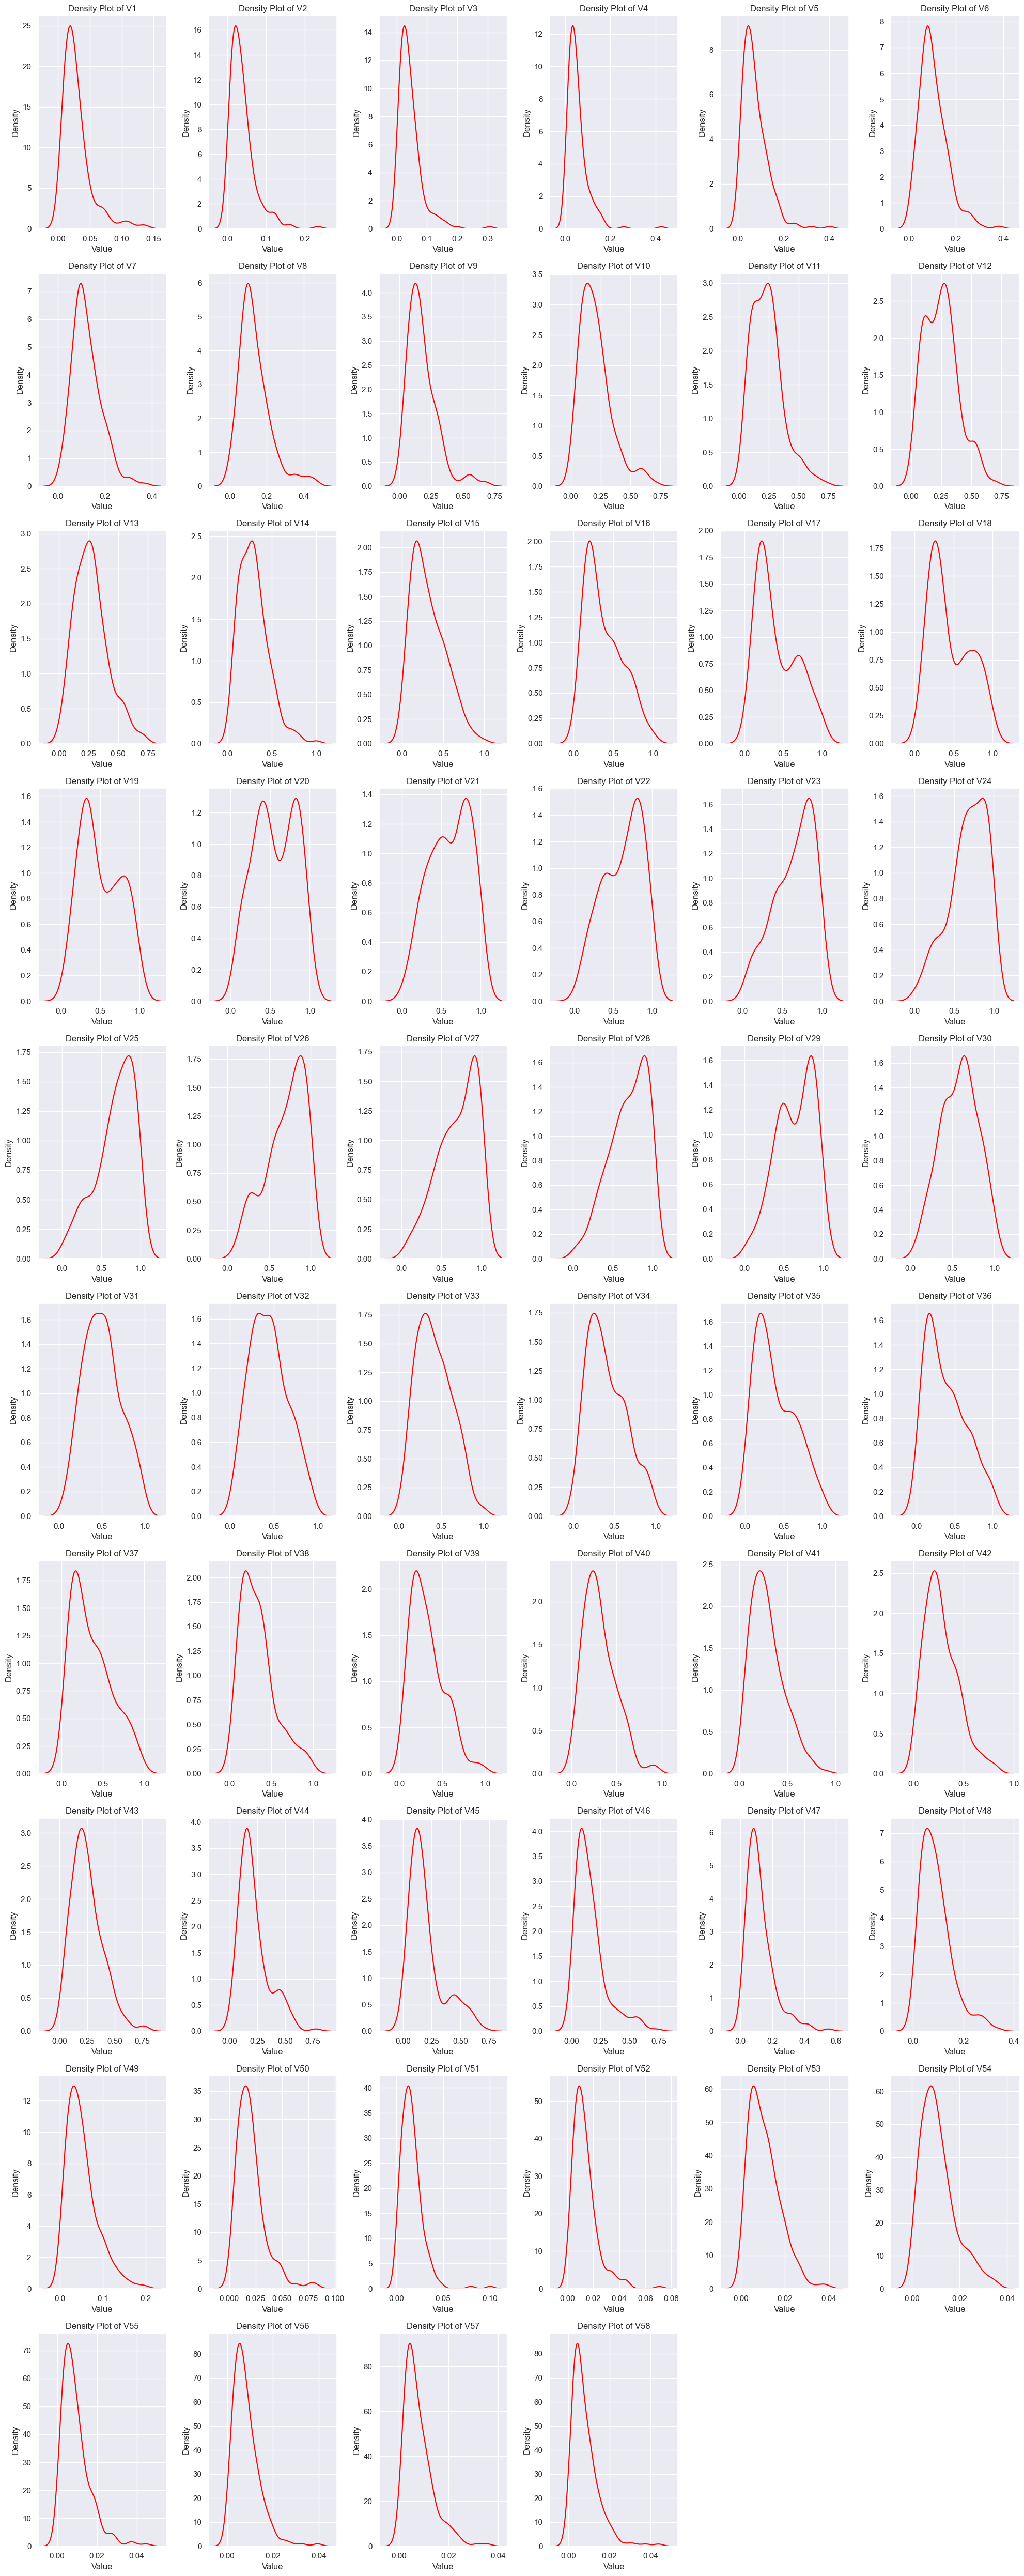

In [13]:
num_features = len(numerical_columns)
num_cols = 6  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create the subplots
plt.figure(figsize=(20, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[feature], fill=False, color='red')
    plt.title(f'Density Plot of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

<b> Training and Testing Data <b>

In [15]:
#Determine the Features & Target Variable:
X= df.drop('Class', axis=1)
y= df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
#scaling the features:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [18]:
#train the Model:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [19]:
#Predicting Test Data:
y_pred=knn_model.predict(scaled_X_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
161,M,M
15,R,R
73,R,R
96,R,R
166,M,M
...,...,...
5,R,R
132,M,M
56,R,R
127,M,M


In [20]:
#Evaluating the model:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9206349206349206

In [21]:
confusion_matrix(y_test,y_pred)

array([[33,  2],
       [ 3, 25]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.94      0.93        35
           R       0.93      0.89      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [23]:
scaler=StandardScaler()
knn=KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations=[('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe=Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,20))
param_grid={'knn__n_neighbors':k_values}
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [25]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

so with this method the best 'n_neighbors' value is 1

# Experiment with another models 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Define a dictionary of regression models to experiment with
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [28]:
# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    cm =confusion_matrix(y_test, y_pred)
    cr=classification_report(y_test, y_pred)
    accuracy=accuracy_score(y_test,y_pred)
      # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Confusion Matrix: {cm}")
    print(f"Classification Report: {cr}")
    print(f"Accuracy score: {accuracy}")
    print("---------------------------")

    

Model: Logistic Regression
Confusion Matrix: [[30  5]
 [ 7 21]]
Classification Report:               precision    recall  f1-score   support

           M       0.81      0.86      0.83        35
           R       0.81      0.75      0.78        28

    accuracy                           0.81        63
   macro avg       0.81      0.80      0.81        63
weighted avg       0.81      0.81      0.81        63

Accuracy score: 0.8095238095238095
---------------------------
Model: Decision Tree
Confusion Matrix: [[24 11]
 [ 5 23]]
Classification Report:               precision    recall  f1-score   support

           M       0.83      0.69      0.75        35
           R       0.68      0.82      0.74        28

    accuracy                           0.75        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.76      0.75      0.75        63

Accuracy score: 0.746031746031746
---------------------------
Model: Random Forest
Confusion Matrix: [[32  3]
 [ 5 

# Final Model:

In [29]:
scaler=StandardScaler()
knn1=KNeighborsClassifier(n_neighbors=1)
operations=[('scaler',scaler),('knn1',knn1)]
pipe=Pipeline(operations)
pipe.fit(X_train, y_train)
pipe_pred= pipe.predict(X_test)

In [30]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           M       0.97      0.91      0.94        35
           R       0.90      0.96      0.93        28

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



<b> Making a Predictive Sysem <b>

In [31]:

#taking random entry from the dataset as input data 
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0687,0.0664,0.1460,0.2792,0.3877,0.4096,0.4981,0.4972,0.5607,0.7989,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine
